# Airline Data Analysis Project

##  Introduction

This project aims to explore and analyze airline passenger and flight data to uncover trends, patterns, and insights in the aviation industry. The dataset includes detailed information on passenger demographics, flight schedules, airport locations, and flight statuses (on-time, delayed, canceled).

By performing data cleaning, visualization, exploratory data analysis (EDA) and Time series Analysis, this project helps:

- Understand passenger distribution by age, gender, and nationality
- Identify trends in flight delays and cancellations
- Analyze airport and route activity across continents
- Discover the busiest travel days and months
- Provide visual summaries useful for airline operations and policymaking

The insights generated can benefit airlines, airport authorities, and regulators in making data-driven decisions for improving efficiency and customer experience.


In [42]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#loading data
data = pd.read_csv('/content/drive/My Drive/projects/airlines data/Airline Dataset Updated - v2.csv')
data.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [46]:
data.describe()

,Age
count,98619.000000
mean,45.504021
std,25.929849
min,1.000000
25%,23.000000
50%,46.000000
75%,68.000000
max,90.000000


In [47]:
data.isna().sum()

,0
Passenger ID,0
First Name,0
Last Name,0
Gender,0
Age,0
Nationality,0
Airport Name,0
Airport Country Code,0
Country Name,0
Airport Continent,0


In [48]:
data.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [49]:
print("Average age of passengers:", data['Age'].mean())

Average age of passengers: 45.50402052342855


In [50]:
print(data['Gender'].value_counts())

Gender
Male      49598
Female    49021
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x78a7a825f050>,
 [Text(-0.010109389961908532, 1.0999535445802238, 'Male'),
  Text(0.010109486122905235, -1.0999535436964285, 'Female')],
 [Text(-0.005514212706495562, 0.599974660680122, '50.3%'),
  Text(0.00551426515794831, -0.5999746601980519, '49.7%')])

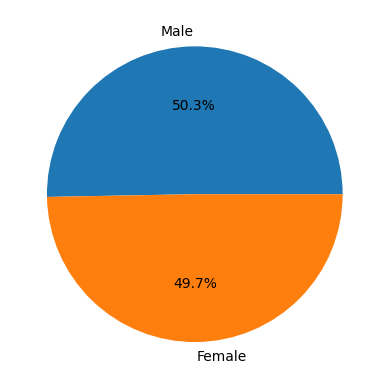

In [51]:

gender_count=data['Gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')

In [52]:
data['Nationality'].unique()

array(['Japan', 'Nicaragua', 'Russia', 'China', 'Brazil', 'Ivory Coast',
       'Vietnam', 'Palestinian Territory', 'Thailand', 'Tunisia',
       'Sweden', 'Colombia', 'Greece', 'Philippines', 'Ukraine',
       'Indonesia', 'Croatia', 'Democratic Republic of the Congo',
       'France', 'Peru', 'Latvia', 'Germany', 'Czech Republic', 'Ireland',
       'Iran', 'Madagascar', 'United States', 'Ghana', 'Mali',
       'Guatemala', 'Kyrgyzstan', 'Haiti', 'Afghanistan', 'Ethiopia',
       'Tanzania', 'Nigeria', 'Cameroon', 'Morocco', 'Armenia', 'Mexico',
       'Chile', 'Albania', 'Luxembourg', 'Honduras', 'Portugal',
       'Kazakhstan', 'Pakistan', 'Poland', 'South Africa', 'Kenya',
       'Serbia', 'Maldives', 'Argentina', 'Uruguay', 'Netherlands',
       'Botswana', 'Egypt', 'Syria', 'Myanmar', 'Slovenia', 'Spain',
       'Macedonia', 'Mongolia', 'Yemen', 'Benin', 'Laos', 'Norway',
       'Sao Tome and Principe', 'Venezuela', 'United Kingdom', 'Denmark',
       'Dominican Republic', 'North

In [53]:
data['Nationality'].nunique()

240

In [54]:

print(data['Nationality'].value_counts())

Nationality
China                          18317
Indonesia                      10559
Russia                          5693
Philippines                     5239
Brazil                          3791
                               ...  
French Southern Territories        2
Saint Martin                       2
Norfolk Island                     1
Jersey                             1
Sint Maarten                       1
Name: count, Length: 240, dtype: int64


# **Data Transformation**

In [55]:
airline=data.copy()
airline.columns=[col.lower().replace(' ', '_') for col in airline.columns]
airline

,passenger_id,first_name,last_name,gender,age,nationality,airport_name,airport_country_code,country_name,airport_continent,continents,departure_date,arrival_airport,pilot_name,flight_status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12-11-2022,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,09-10-2022,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Judon Chasle,Cancelled


In [56]:
airline['departure_date'].dtypes

dtype('O')

In [57]:

airline['departure_date']=airline['departure_date'].str.replace('-', '/')
airline['departure_date']=pd.to_datetime(airline['departure_date'])

In [58]:

airline['departure_date'].dtypes

dtype('<M8[ns]')

In [59]:
# airline=airline.set_index('departure_date')
airline

,passenger_id,first_name,last_name,gender,age,nationality,airport_name,airport_country_code,country_name,airport_continent,continents,departure_date,arrival_airport,pilot_name,flight_status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,hnGQ62,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,2022-12-11,HAA,Pammie Kingscote,Cancelled
98615,2omEzh,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,2022-10-30,IVA,Dorice Lochran,Cancelled
98616,VUPiVG,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,2022-09-10,ABC,Gearalt Main,On Time
98617,E47NtS,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,2022-10-26,GGN,Judon Chasle,Cancelled


In [60]:
def cat_age (string):
    # string=int(string)
    if str(string) == 'nan':
        return 'Unknown'
    elif int(string) <= 10:
        return 'Child'

    elif 10 <= int(string) <= 18:
        return 'Teen'

    elif 19 <= int(string) <= 45:
        return 'Adult'

    elif int(string) > 45:
        return 'Elder'

In [61]:
airline['age_group']=airline['age'].apply(cat_age)
airline.head()

,passenger_id,first_name,last_name,gender,age,nationality,airport_name,airport_country_code,country_name,airport_continent,continents,departure_date,arrival_airport,pilot_name,flight_status,age_group
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,Elder
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,Elder
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,Elder
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,Elder
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,Adult


In [62]:
airline['age_group'].value_counts()

,count
age_group,
Elder,49383
Adult,29590
Child,10896
Teen,8750


([<matplotlib.patches.Wedge at 0x78a7a82abad0>,
 [Text(-0.0025755743508514856, 1.0999969847307598, 'Elder'),
  Text(-0.6422667835755949, -0.8930248477592659, 'Adult'),
  Text(0.6798182817834386, -0.864781535275247, 'Child'),
  Text(1.057543534779502, -0.3026576812936964, 'Teen')],
 [Text(-0.001404858736828083, 0.5999983553076871, '50.1%'),
  Text(-0.350327336495779, -0.487104462414145, '30.0%'),
  Text(0.37080997188187553, -0.4716990192410438, '11.0%'),
  Text(0.5768419280615464, -0.16508600797837983, '8.9%')])

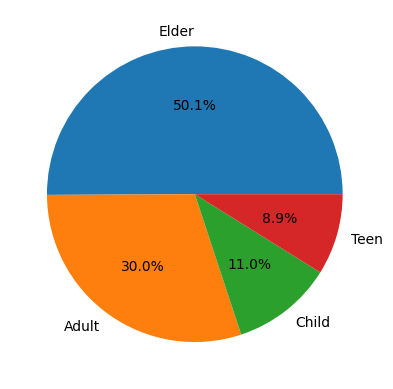

In [63]:
age_group_count=airline['age_group'].value_counts()
plt.pie(age_group_count, labels=age_group_count.index, autopct='%1.1f%%')

## **Data visualisation**

In [64]:
airline.columns

Index(['passenger_id', 'first_name', 'last_name', 'gender', 'age',
       'nationality', 'airport_name', 'airport_country_code', 'country_name',
       'airport_continent', 'continents', 'departure_date', 'arrival_airport',
       'pilot_name', 'flight_status', 'age_group'],
      dtype='object')

In [65]:

for col in airline.columns:
    print(col, airline[col].nunique())

passenger_id 98619
first_name 8437
last_name 41658
gender 2
age 90
nationality 240
airport_name 9062
airport_country_code 235
country_name 235
airport_continent 6
continents 6
departure_date 364
arrival_airport 9024
pilot_name 98605
flight_status 3
age_group 4


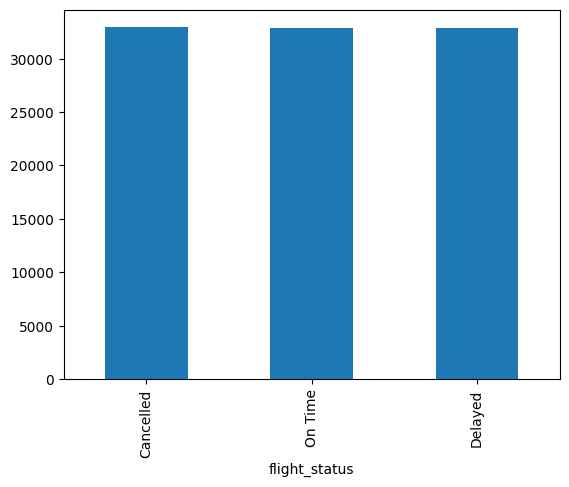

In [66]:
airline['flight_status'].value_counts().plot(kind='bar')
plt.show()

<Axes: >

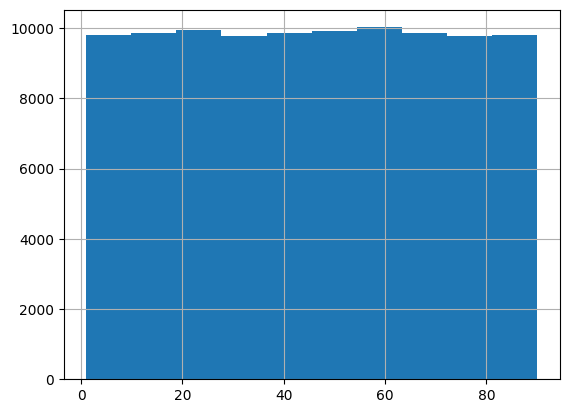

In [67]:

airline['age'].hist(bins=10)

In [68]:
airline.groupby(['age_group', 'flight_status']).size().unstack()

flight_status,Cancelled,Delayed,On Time
age_group,,,
Adult,9903,9801,9886
Child,3618,3655,3623
Elder,16490,16496,16397
Teen,2931,2879,2940


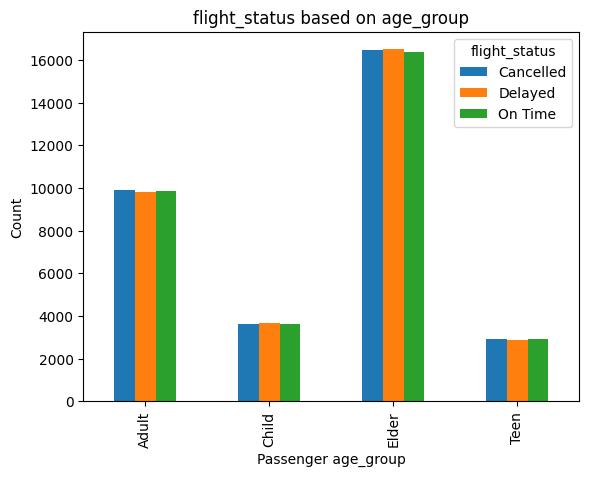

In [69]:
airline.groupby(['age_group', 'flight_status']).size().unstack().plot(kind='bar', stacked=False)
plt.title(f'{"flight_status"} based on {"age_group"}')
plt.xlabel(f'Passenger {"age_group"}')
plt.ylabel('Count')
plt.show()
plt.show()

In [70]:
def plot_groupbar (data, x_column, legend_column):
    data.groupby([x_column, legend_column]).size().unstack().plot(kind='bar', stacked=False)
    plt.title(f'{legend_column} based on {x_column}')
    plt.xlabel(f'Passenger {x_column}')
    plt.ylabel('Count')
    plt.show()

In [71]:
def plot_bar (data):
    data.plot(kind='bar', stacked=False)
    # plt.title(f'{legend_column}')
    # plt.xlabel(f'Passenger {x_column}')
    plt.ylabel('Count')
    plt.show()

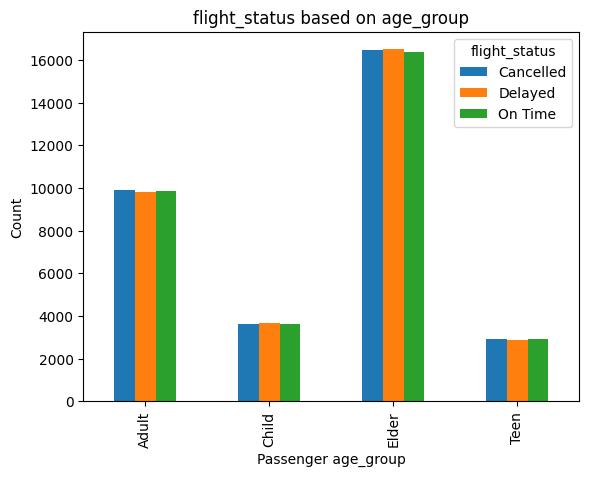

In [72]:
plot_groupbar (airline, 'age_group', 'flight_status')

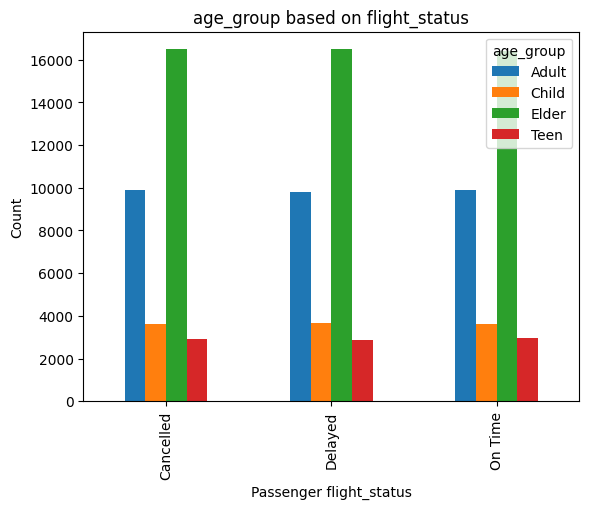

In [73]:
plot_groupbar (airline, 'flight_status', 'age_group')

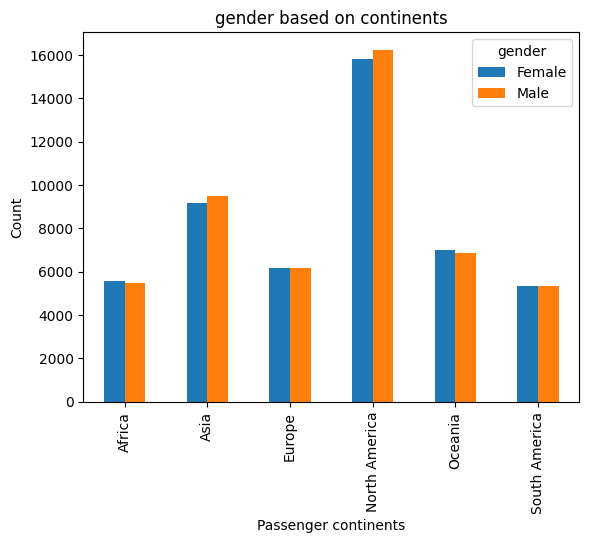

In [74]:
plot_groupbar (airline, 'continents', 'gender')

In [75]:
airline.columns

Index(['passenger_id', 'first_name', 'last_name', 'gender', 'age',
       'nationality', 'airport_name', 'airport_country_code', 'country_name',
       'airport_continent', 'continents', 'departure_date', 'arrival_airport',
       'pilot_name', 'flight_status', 'age_group'],
      dtype='object')

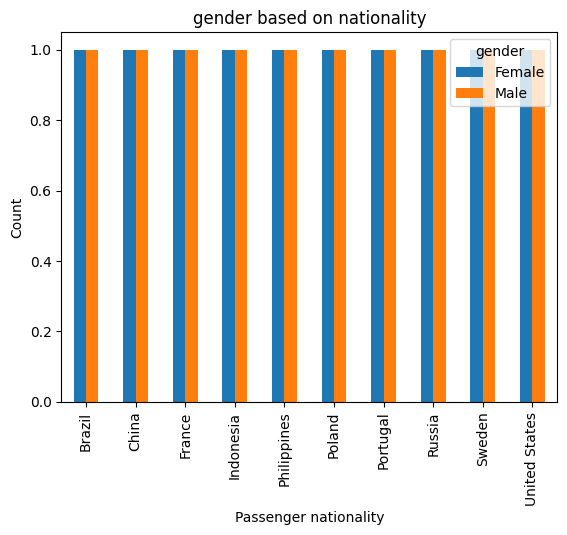

In [76]:
# top 20 countries
top_20_nations = airline[['nationality', 'gender']].value_counts().nlargest(20)
plot_groupbar (top_20_nations, 'nationality', 'gender')


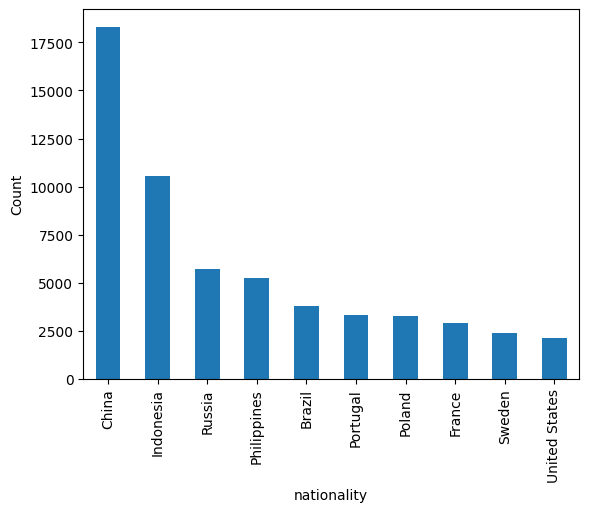

In [77]:
# top 10 countries
top_10_nations = airline['nationality'].value_counts().nlargest(10)
plot_bar (top_10_nations)

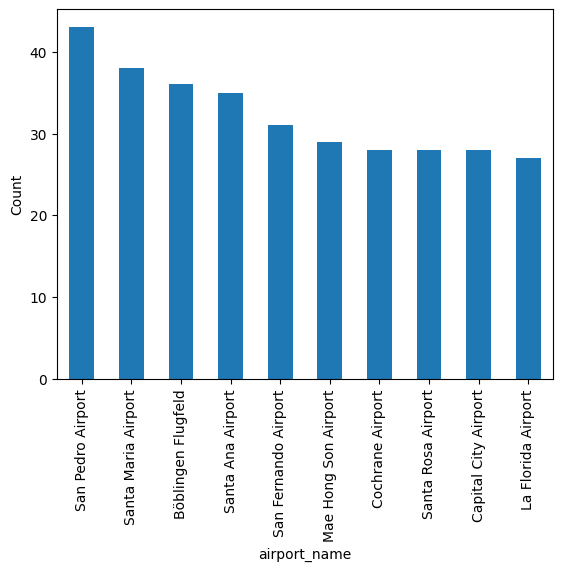

In [78]:
# top 10 countries
top_10_nations = airline['airport_name'].value_counts().nlargest(10)
plot_bar (top_10_nations)

In [79]:
airline[['airport_name', 'gender']].value_counts().nlargest(10).reset_index()

,airport_name,gender,count
0,Santa Maria Airport,Female,22
1,San Pedro Airport,Male,22
2,San Pedro Airport,Female,21
3,Santa Ana Airport,Male,19
4,San Fernando Airport,Male,19
5,Kiunga Airport,Male,19
6,Herrera Airport,Female,18
7,Grant County Airport,Male,18
8,Böblingen Flugfeld,Female,18
9,Böblingen Flugfeld,Male,18


In [80]:
def plot_top_groupbar (data, x_column, legend_column, size=10):
    top=airline[x_column].value_counts().nlargest(size).index.to_list()
    data=data[data[x_column].isin(top)]

    data.groupby([x_column, legend_column]).size().unstack().plot(kind='bar', stacked=False, figsize=(10, 6))
    plt.title(f'{legend_column} based on {x_column}')
    plt.xlabel(f'Passenger {x_column}')
    plt.ylabel('Count')
    plt.show()

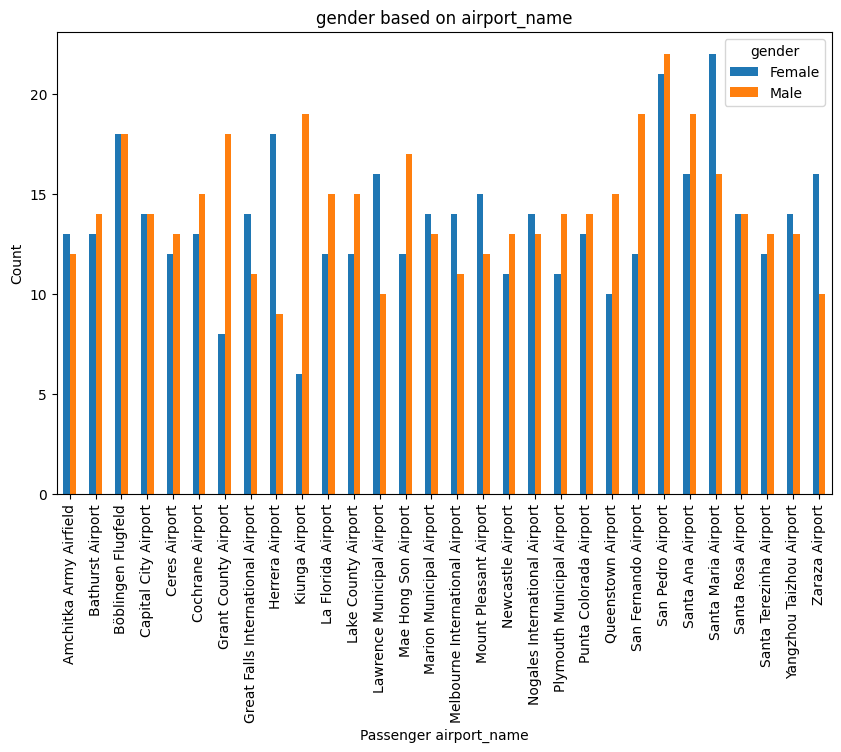

In [81]:

plot_top_groupbar(airline, 'airport_name', 'gender', size=30)

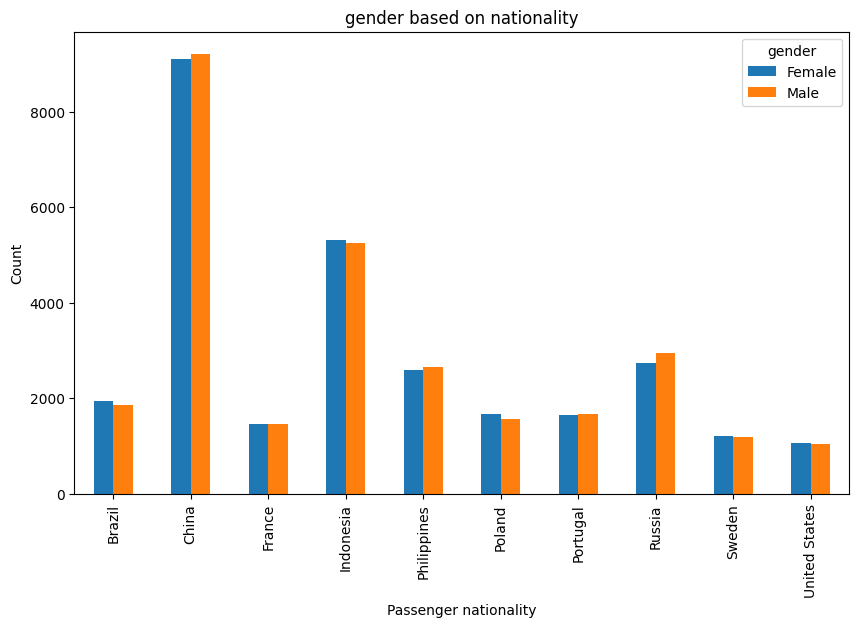

In [82]:
plot_top_groupbar(airline, 'nationality', 'gender', size=10)

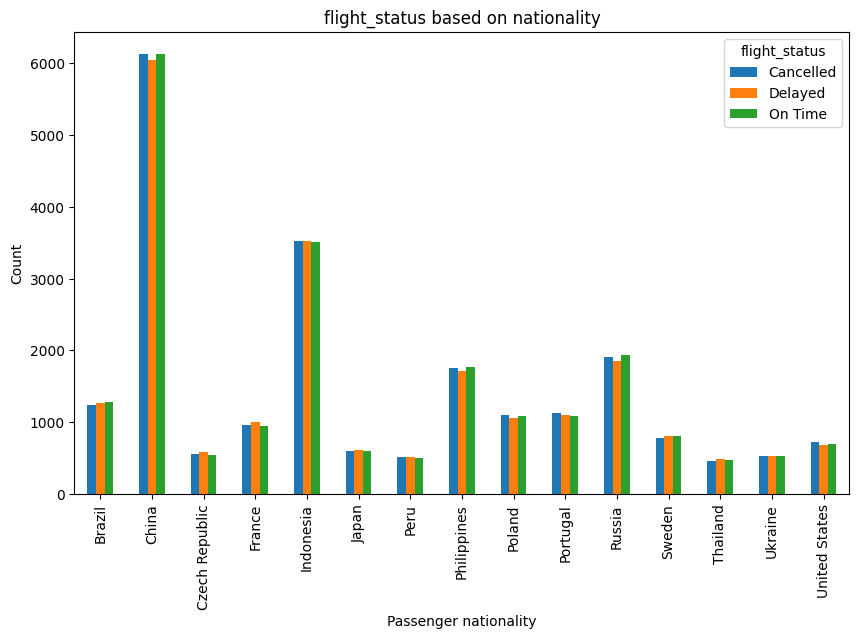

In [83]:
plot_top_groupbar(airline, 'nationality', 'flight_status', size=15)


# **Analyze departure dates**

In [84]:
airline.columns

Index(['passenger_id', 'first_name', 'last_name', 'gender', 'age',
       'nationality', 'airport_name', 'airport_country_code', 'country_name',
       'airport_continent', 'continents', 'departure_date', 'arrival_airport',
       'pilot_name', 'flight_status', 'age_group'],
      dtype='object')

In [85]:
airline['departure_day'] = airline['departure_date'].dt.day_name()  # Extract day name
print("Busiest days for flights:")
airline['departure_day'].value_counts()

Busiest days for flights:


,count
departure_day,
Sunday,14289
Thursday,14227
Friday,14227
Tuesday,14048
Monday,14032
Wednesday,13939
Saturday,13857


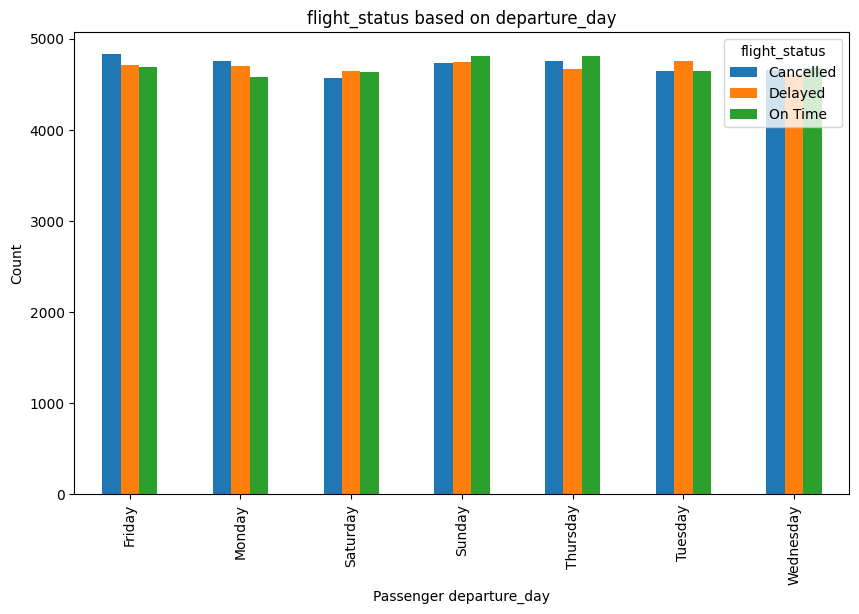

In [86]:
plot_top_groupbar(airline, 'departure_day', 'flight_status', size=10)

<Axes: xlabel='departure_day'>

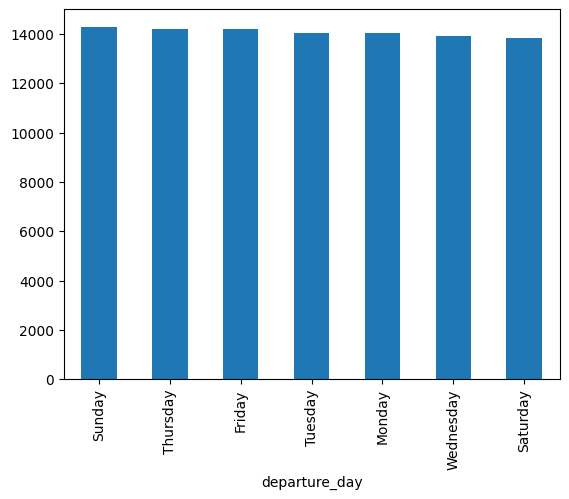

In [87]:
airline['departure_day'].value_counts().plot(kind='bar')

In [88]:
airline['departure_month'] = airline['departure_date'].dt.month  # Extract month name
print("Busiest months for flights:")
airline['departure_month'].value_counts()

Busiest months for flights:


,count
departure_month,
8,8544
5,8496
7,8451
3,8431
1,8416
10,8415
9,8149
6,8128
11,8053


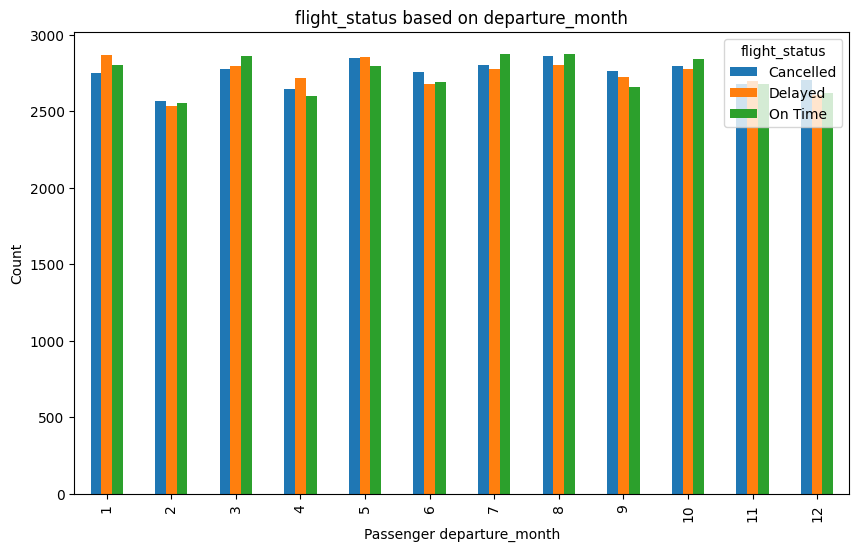

In [89]:
plot_top_groupbar(airline, 'departure_month', 'flight_status', size=12)


# **Time Series Analysis**

In [90]:
airline['departure_date']=pd.to_datetime(airline['departure_date'])

In [91]:
airline.dtypes

,0
passenger_id,object
first_name,object
last_name,object
gender,object
age,int64
nationality,object
airport_name,object
airport_country_code,object
country_name,object
airport_continent,object


In [92]:
depart_status=airline.groupby('flight_status')['departure_date'].value_counts().unstack().T
# depart_status=airline.groupby('flight_status')['departure_date'].value_counts().T
depart_status

flight_status,Cancelled,Delayed,On Time
departure_date,,,
2022-01-01,91,92,84
2022-01-02,85,89,75
2022-01-03,96,74,82
2022-01-04,88,91,88
2022-01-05,94,96,81
...,...,...,...
2022-12-26,94,78,90
2022-12-27,91,82,75
2022-12-28,83,80,78


<ipython-input-93-557702949>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = depart_status.resample('M').mean()


<Axes: xlabel='departure_date', ylabel='Cancelled'>

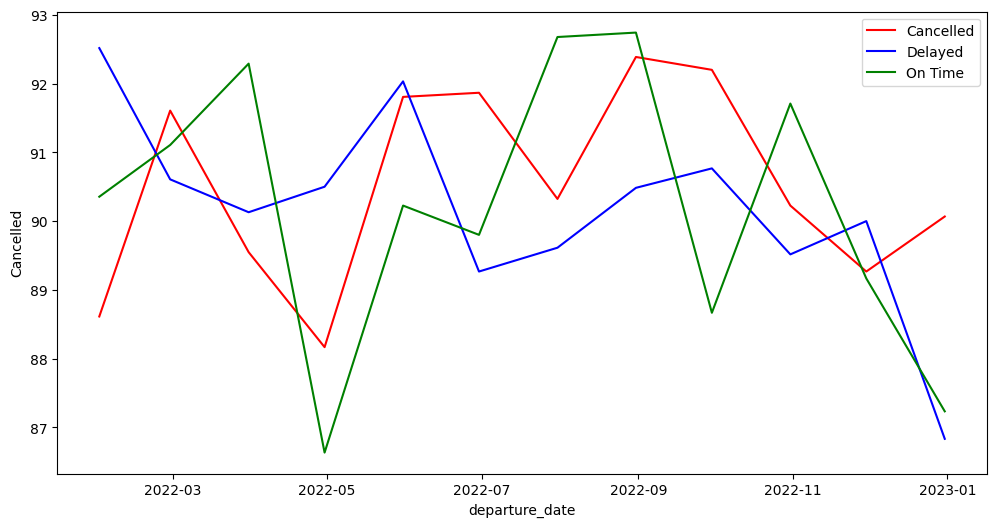

In [93]:
df_resampled = depart_status.resample('M').mean()

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df_resampled, x='departure_date', y='Cancelled', label='Cancelled', color='red')
sns.lineplot(data=df_resampled, x='departure_date', y='Delayed', label='Delayed', color='blue')
sns.lineplot(data=df_resampled, x='departure_date', y='On Time', label='On Time', color='green')

<Axes: xlabel='departure_date', ylabel='Cancelled'>

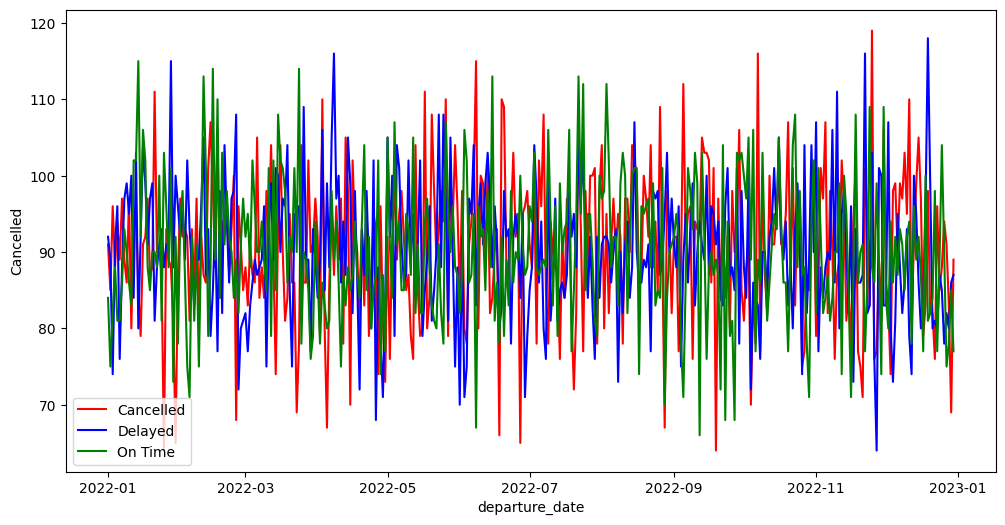

In [94]:
plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=depart_status, x='departure_date', y='Cancelled', label='Cancelled', color='red')
sns.lineplot(data=depart_status, x='departure_date', y='Delayed', label='Delayed', color='blue')
sns.lineplot(data=depart_status, x='departure_date', y='On Time', label='On Time', color='green')

<Axes: xlabel='departure_date', ylabel='Cancelled'>

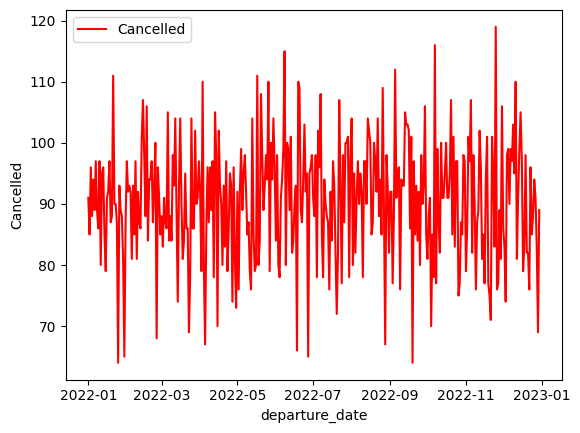

In [95]:
sns.lineplot(data=depart_status, x='departure_date', y='Cancelled', label='Cancelled', color='red')